In [1]:
import numpy as np
from scipy import misc
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import pandas 

def read_scene():
    data_x = misc.imread('umass_campus.jpg')
 
    return (data_x)
data_x = read_scene()
print('X = ', data_x.shape)
flattened_image = data_x.ravel().reshape(data_x.shape[0] * data_x.shape[1], data_x.shape[2])
flattened_image = flattened_image / 255   ##  I divide by 255 so that plt.show() shows the right colors

X =  (400, 400, 3)


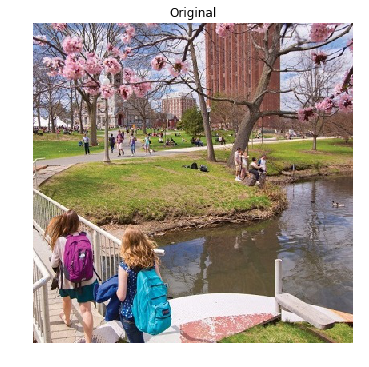

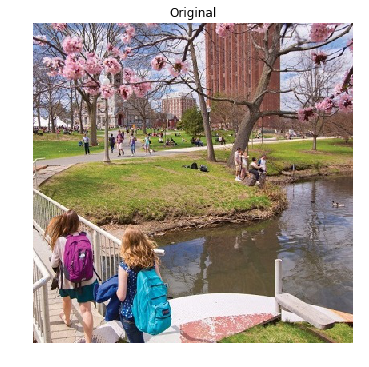

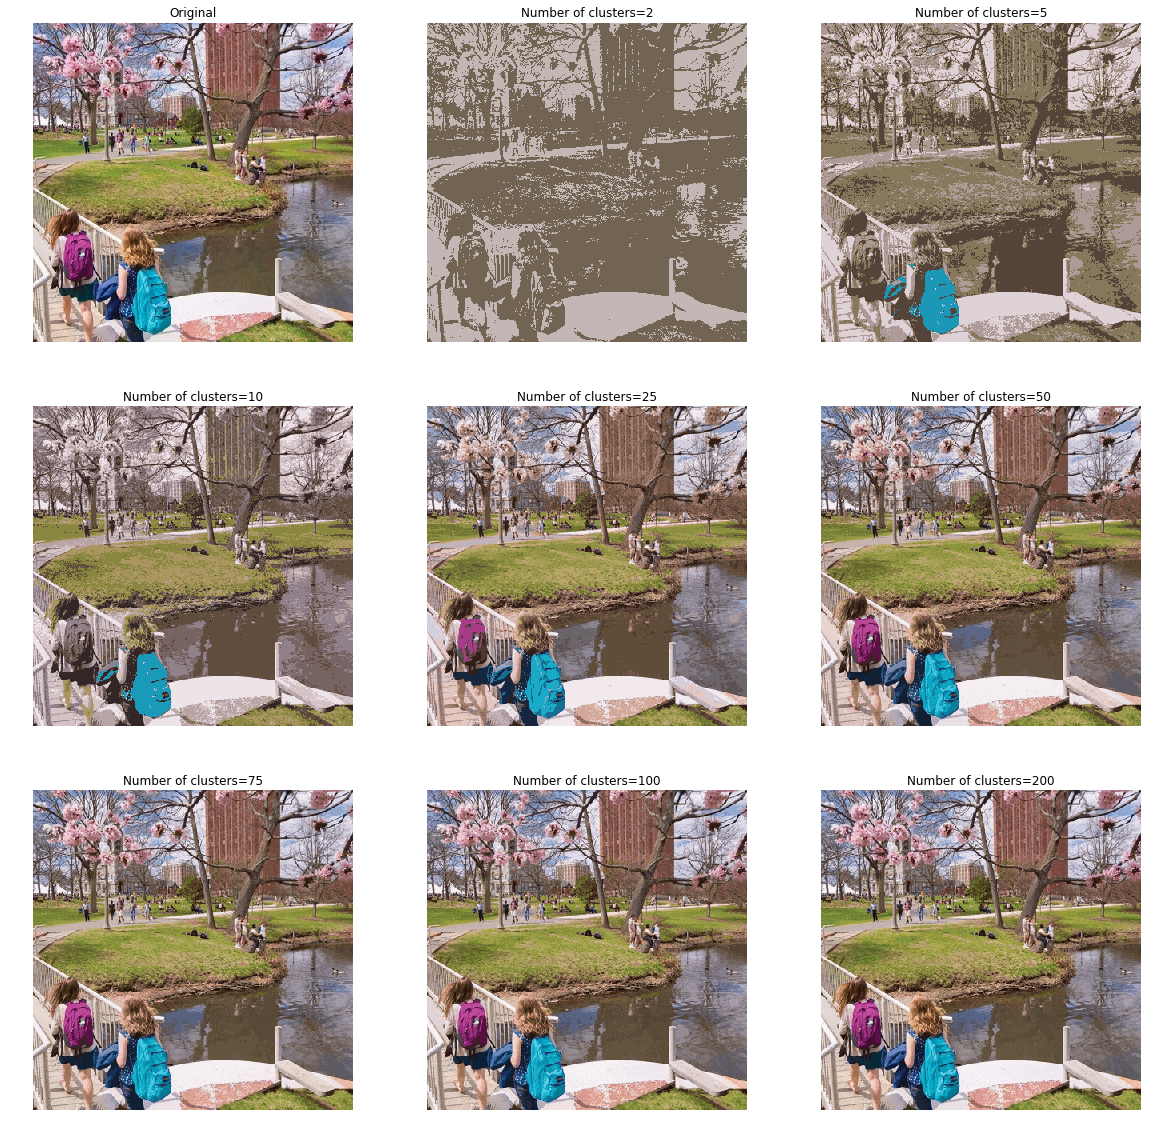

In [4]:
# Plotting the original image
fig = plt.figure(figsize=(20,20))
cluster_number=[2,5,10,25,50,75,100,200]
plt.subplot(3,3,1)
name= 'Original'
plt.imshow(data_x)
plt.title(name,horizontalalignment='center', y=1)
plt.axis('off')

Reconstruction_Error=np.zeros((8,1))
for i in range(1,len(cluster_number) + 1):

    kmeansclustering = KMeans(n_clusters=cluster_number[i-1], random_state=0).fit(flattened_image)
    clusters = kmeansclustering.predict(flattened_image)
    cluster_centers = kmeansclustering.cluster_centers_
    clusters = np.transpose(np.asmatrix(clusters))
    flattened_image_Reconstructed = np.zeros((160000,3))
    
    for j in range(0,160000):
        flattened_image_Reconstructed[j,:] = cluster_centers[clusters[j]]
        
    Reconstruction_Error[i-1]= np.sqrt((np.power((flattened_image_Reconstructed -  flattened_image),2)).mean()  )     
    Reconstructed_Image = flattened_image_Reconstructed.ravel().reshape(data_x.shape[0], data_x.shape[1], data_x.shape[2])
    plt.subplot(3,3,i+1)
    name= 'Number of clusters=' + str(cluster_number[i-1])
    plt.imshow(Reconstructed_Image)
    plt.title(name,horizontalalignment='center', y=1)
    plt.axis('off')
    
    
    
    
plt.savefig("KMeansClustering.jpg")     
plt.show()

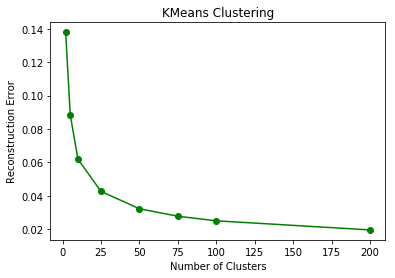

In [5]:
fig = plt.figure()
plt.xlabel("Number of Clusters")
plt.ylabel("Reconstruction Error")
plt.title("KMeans Clustering")
plt.plot(cluster_number,Reconstruction_Error,'-o',color='green')
plt.savefig("KMeansError.jpg") 
plt.show()